In [1]:
# Import all necessary packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# Load the data
df = pd.read_csv('C:/Users/12034/OneDrive/Documents/WGU/medical_raw_data.csv')

In [3]:
# Summarize the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [4]:
# Assess for duplicates
print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [5]:
# Assess for missing values
df.isnull().sum()

Unnamed: 0               0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
A

array([[<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Overweight'}>],
       [<Axes: title={'center': 'Anxiety'}>,
        <Axes: title={'center': 'Initial_days'}>]], dtype=object)

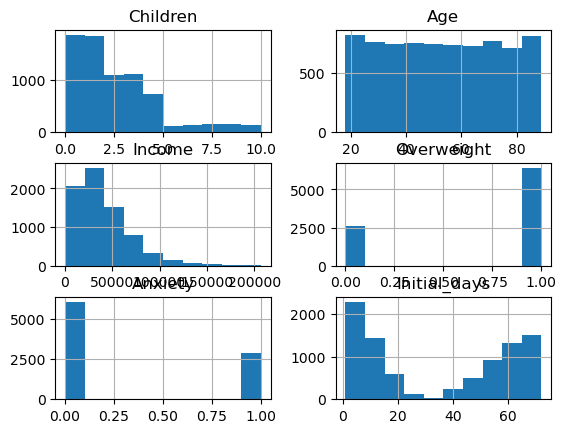

In [6]:
# Output above shows missing values for: 'Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety', & 'Initial_days'
# Assess the distribution & median of these variables using a histogram
df[['Children', 'Age', 'Income', 'Soft_drink', 'Overweight', 'Anxiety', 'Initial_days']].hist()

In [7]:
# Perform univariate imputation to replace quantitative variables with the median
df['Children'].fillna(df['Children'].median(), inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Initial_days'].fillna(df['Initial_days'].median(), inplace=True)

In [8]:
# Perform univariate imputation to replace qualitative variables with the mode
df['Soft_drink']=df['Soft_drink'].fillna(df['Soft_drink'].mode()[0])
df['Overweight']=df['Overweight'].fillna(df['Overweight'].mode()[0])
df['Anxiety']=df['Anxiety'].fillna(df['Anxiety'].mode()[0])

In [9]:
# Verify imputation was successful
df.isnull().sum()

Unnamed: 0            0
CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
Timezone              0
Job                   0
Children              0
Age                   0
Education             0
Employment            0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
VitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services        

In [10]:
# Store quantitative variables
medical_quant=df.select_dtypes(include=[np.number])

<Axes: >

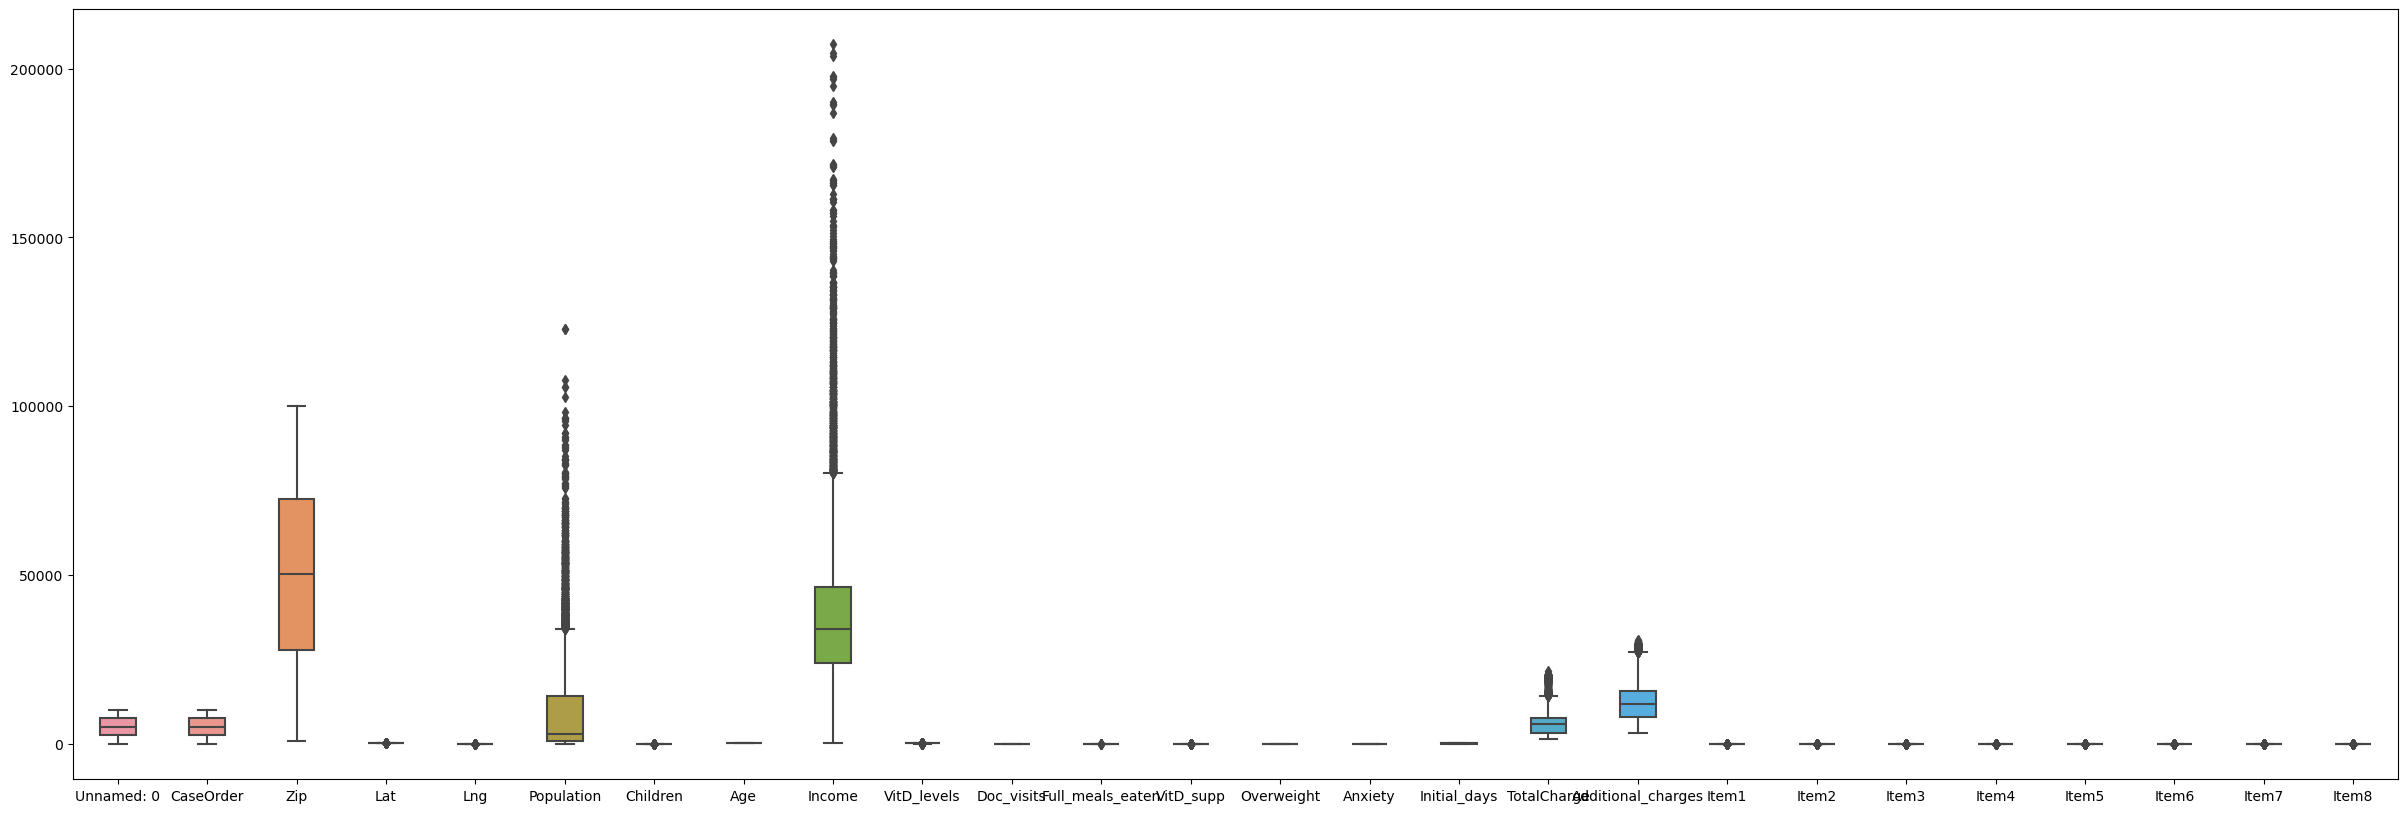

In [11]:
# Create seaborn boxplots of quantitative variables
plt.subplots(figsize=(30, 10))
sns.boxplot(data=medical_quant, width=0.4)

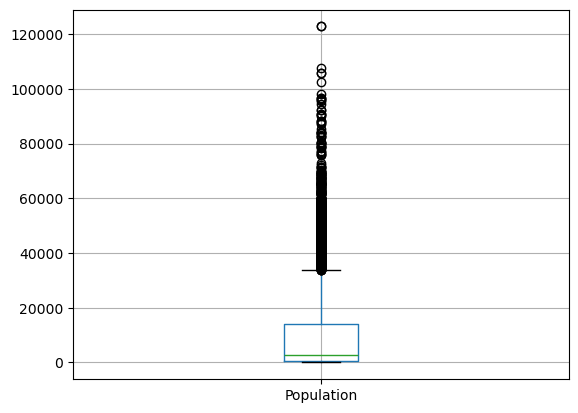

In [12]:
# Create boxplots for variables with outliers: Population, Income, TotalCharge, & Additional_charges
# Start by creating boxplot of Population
population_bp=df.boxplot(column=['Population'])

In [13]:
pop_query = df.query('Population > 35000')
pop_query.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805 entries, 8 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          805 non-null    int64  
 1   CaseOrder           805 non-null    int64  
 2   Customer_id         805 non-null    object 
 3   Interaction         805 non-null    object 
 4   UID                 805 non-null    object 
 5   City                805 non-null    object 
 6   State               805 non-null    object 
 7   County              805 non-null    object 
 8   Zip                 805 non-null    int64  
 9   Lat                 805 non-null    float64
 10  Lng                 805 non-null    float64
 11  Population          805 non-null    int64  
 12  Area                805 non-null    object 
 13  Timezone            805 non-null    object 
 14  Job                 805 non-null    object 
 15  Children            805 non-null    float64
 16  Age         

In [14]:
# Replace outliers with nulls
df['Population']=np.where(df['Population']>35000,np.nan,df['Population'])

In [15]:
# Impute nulls with median
df['Population'].fillna(df['Population'].median(), inplace=True)

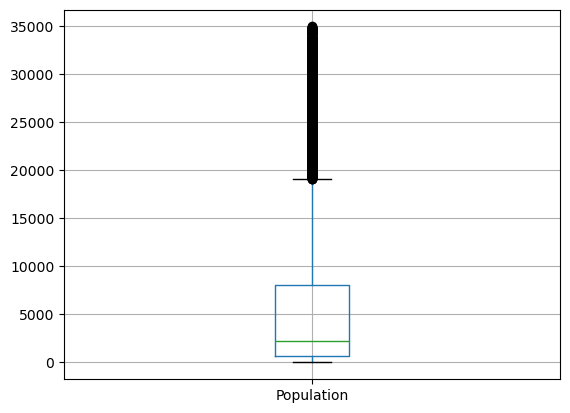

In [16]:
#Confirm values are below 35000
population_bp=df.boxplot(column=['Population'])

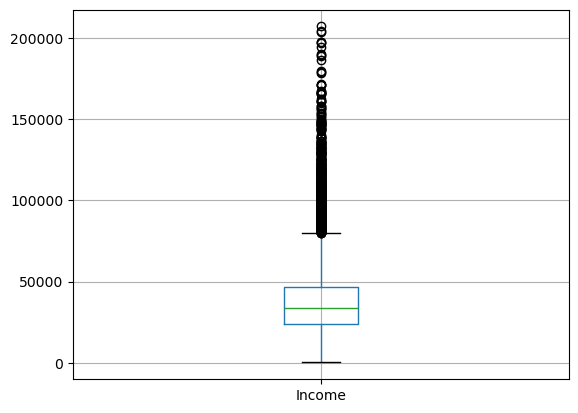

In [17]:
# Create boxplot of Income
income_bp=df.boxplot(column=['Income'])

In [18]:
income_query = df.query('Income > 80000')
income_query.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 9986
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          714 non-null    int64  
 1   CaseOrder           714 non-null    int64  
 2   Customer_id         714 non-null    object 
 3   Interaction         714 non-null    object 
 4   UID                 714 non-null    object 
 5   City                714 non-null    object 
 6   State               714 non-null    object 
 7   County              714 non-null    object 
 8   Zip                 714 non-null    int64  
 9   Lat                 714 non-null    float64
 10  Lng                 714 non-null    float64
 11  Population          714 non-null    float64
 12  Area                714 non-null    object 
 13  Timezone            714 non-null    object 
 14  Job                 714 non-null    object 
 15  Children            714 non-null    float64
 16  Age         

In [19]:
# Replace outliers with nulls
df['Income']=np.where(df['Income']>80000,np.nan,df['Income'])

In [20]:
# Impute nulls with median
df['Income'].fillna(df['Income'].median(), inplace=True)

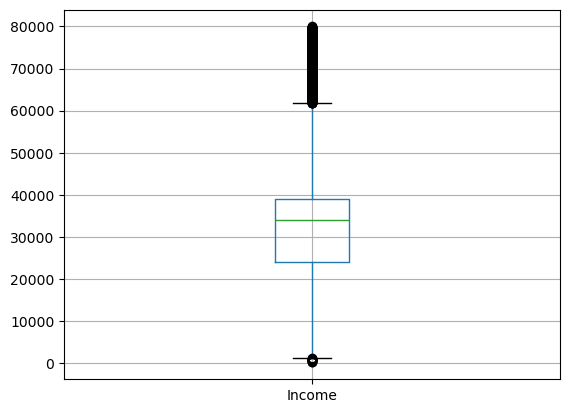

In [21]:
# Confirm values are below 80000
income_bp=df.boxplot(column=['Income'])

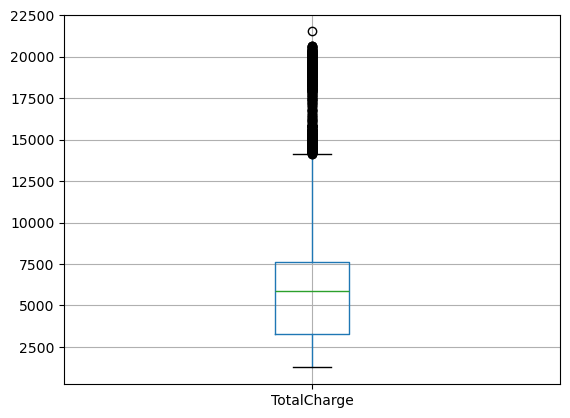

In [22]:
# Create boxplot of TotalCharge
totcharge_bp=df.boxplot(column=['TotalCharge'])

In [23]:
tot_query = df.query('TotalCharge > 14000')
tot_query.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472 entries, 11 to 9973
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          472 non-null    int64  
 1   CaseOrder           472 non-null    int64  
 2   Customer_id         472 non-null    object 
 3   Interaction         472 non-null    object 
 4   UID                 472 non-null    object 
 5   City                472 non-null    object 
 6   State               472 non-null    object 
 7   County              472 non-null    object 
 8   Zip                 472 non-null    int64  
 9   Lat                 472 non-null    float64
 10  Lng                 472 non-null    float64
 11  Population          472 non-null    float64
 12  Area                472 non-null    object 
 13  Timezone            472 non-null    object 
 14  Job                 472 non-null    object 
 15  Children            472 non-null    float64
 16  Age        

In [24]:
# Replace outliers with nulls
df['TotalCharge']=np.where(df['TotalCharge']>14000,np.nan,df['TotalCharge'])

In [25]:
# Impute nulls with median
df['TotalCharge'].fillna(df['TotalCharge'].median(), inplace=True)

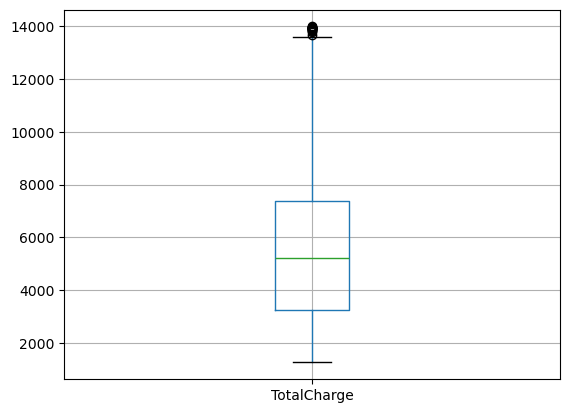

In [26]:
#Confirm values are below 14000
totcharge_bp=df.boxplot(column=['TotalCharge'])

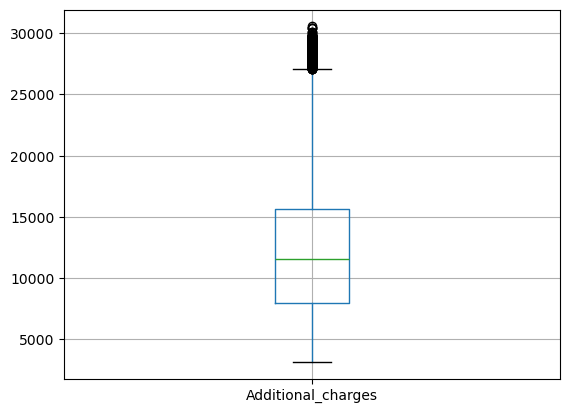

In [27]:
# Create boxplot of Additional_charges
addcharges_bp=df.boxplot(column=['Additional_charges'])

In [28]:
add_query = df.query('Additional_charges > 27000')
add_query.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 20 to 9996
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          432 non-null    int64  
 1   CaseOrder           432 non-null    int64  
 2   Customer_id         432 non-null    object 
 3   Interaction         432 non-null    object 
 4   UID                 432 non-null    object 
 5   City                432 non-null    object 
 6   State               432 non-null    object 
 7   County              432 non-null    object 
 8   Zip                 432 non-null    int64  
 9   Lat                 432 non-null    float64
 10  Lng                 432 non-null    float64
 11  Population          432 non-null    float64
 12  Area                432 non-null    object 
 13  Timezone            432 non-null    object 
 14  Job                 432 non-null    object 
 15  Children            432 non-null    float64
 16  Age        

In [29]:
# Replace outliers with nulls
df['Additional_charges']=np.where(df['Additional_charges']>27000,np.nan,df['Additional_charges'])

In [30]:
# Impute nulls with median
df['Additional_charges'].fillna(df['Additional_charges'].median(), inplace=True)

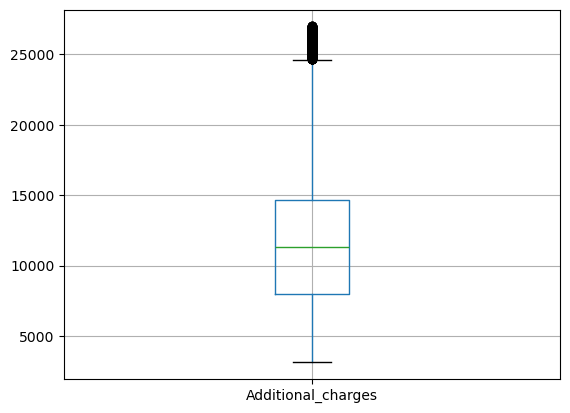

In [31]:
#Confirm values are below 27000
addcharges_bp=df.boxplot(column=['Additional_charges'])

In [32]:
#'Overweight' & 'Anxiety' variables are expressed numerically, however the data dictionary states they should be categorical
# Will re-express these variables as yes/no with ordinal encoding
# First will replicate the variables
df['overweight_cat'] = df['Overweight']
df['anxiety_cat'] = df['Anxiety']

In [33]:
# Set up dictionary to convert numeric to categorical
dict_overweight = {"overweight_cat": {0:"No", 1:"Yes"}}
dict_anxiety = {"anxiety_cat": {0:"No", 1:"Yes"}}

In [34]:
# Replace variables using dictionary
df.replace(dict_overweight, inplace=True)
df.replace(dict_anxiety, inplace=True)

In [35]:
# Verify re-expression
df.overweight_cat.unique()
df.anxiety_cat.unique()

array(['Yes', 'No'], dtype=object)

In [36]:
# Check summary of data again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  float64
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  float64
 16  Age  

In [37]:
#Save output to csv file
df.to_csv('C:/Users/12034/OneDrive/Documents/WGU/medical_raw_data_clean.csv')

In [38]:
# Define variables for PCA (all quantitative, continuous variables)
df_pca = df[['Lat', 'Lng', 'Income', 'VitD_levels', 'Initial_days', 'TotalCharge', 'Additional_charges']]

In [39]:
# Normalize the data
df_normalized = (df_pca-df_pca.mean())/df_pca.std()

In [40]:
# Find the # of PCs created
pca = PCA(n_components = df_pca.shape[1])

In [41]:
# Fit PCA on the normalized data set
pca.fit(df_normalized)

PCA(n_components=7)

In [42]:
# Convert back to data frame
df_pca_final = pd.DataFrame(pca.transform(df_normalized),
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

In [43]:
# Run PCA Loadings
loadings = pd.DataFrame(pca.components_.T, 
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], 
index = df_pca.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Lat,-0.015718,0.699445,0.083041,-0.046854,-0.072249,-0.704426,-0.001600
Lng,-0.013926,-0.701527,-0.084440,-0.025870,0.021443,-0.706687,-0.000597
Income,0.000085,-0.026260,0.240892,0.953032,-0.176523,-0.042959,-0.002411
VitD_levels,0.045951,-0.040135,0.716019,-0.055245,0.691226,-0.023583,-0.046834
Initial_days,0.705099,0.007208,-0.068339,0.010754,-0.023041,-0.013382,-0.705186
TotalCharge,0.706997,0.000927,0.002825,-0.000145,-0.002520,-0.015859,0.707028
Additional_charges,0.020906,-0.127607,0.640768,-0.292742,-0.696297,0.039309,-0.024958


In [44]:
# Calculate covariance and vectors
cov_matrix = np.dot(df_normalized.T, df_normalized) / df_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

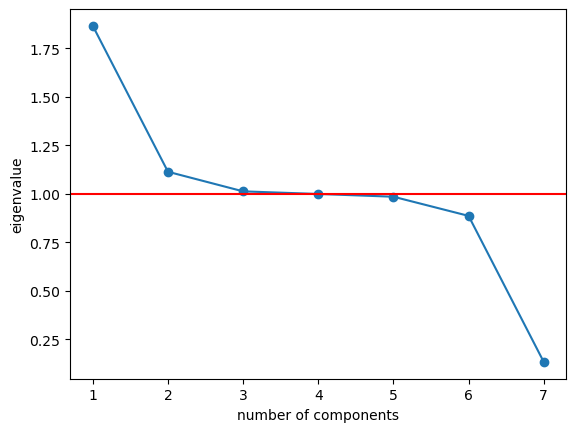

In [45]:
# Relabel axis to begin at 1 not 0
plt.plot(np.arange(1,len(eigenvalues)+1),eigenvalues,marker='o')
# Create scree plot
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color="red")
plt.show()

In [46]:
print(eigenvalues)

[1.8664462056405111, 1.1142436976945134, 1.0131929854594794, 0.9996923593136655, 0.985531766182169, 0.8867079726782713, 0.13348501303138022]
